In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# Opdracht 5.1  

### Shallow Model

5.1a) Hier wordt een shallow model aan gemaakt met 1 neuron.

In [68]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

5.1a) Hier wordt het neurale netwerk getraind op de training dataset 

In [69]:
model.fit(X_train, y_train, epochs=200, verbose=0)

5.1a) Hier wordt het neurale netwerk getest op de testing dataset

In [70]:
results = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 890us/step - loss: 0.3187 - accuracy: 0.8467


In [71]:
results

[0.3186793625354767, 0.846666693687439]

5.1b)     
![Neural network](./5.1b.png)     
5.1c) Het shallow model werkt niet omdat er te weining neuronen zijn om features te kunnen herkennen.

In [72]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


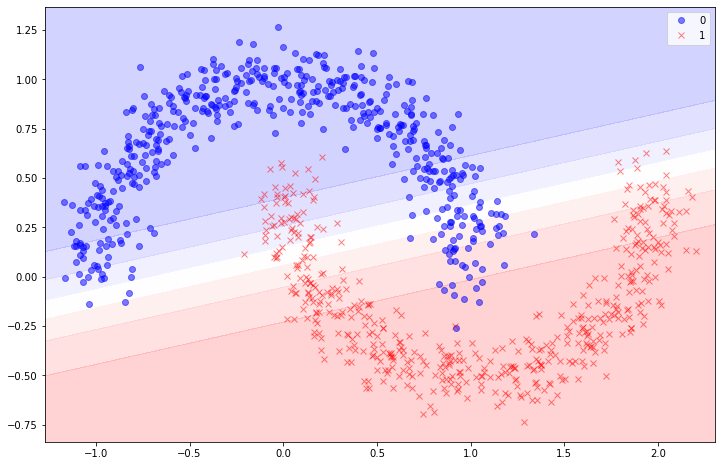

In [73]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Reflectie
Het is nu duidelijk hoe